# A/B Testing for E-Commerce Fashion Brand
To practice skills in A/B testing, I utilized a dataset designed for this purpose and created a fictional backstory for the company I will analyze.

### ChicBeads
ChicBeads, a sister store to a popular online fashion retailer known for its trendy and affordable clothing, specializes in creating colorful beaded jewelry that complements many of the outfits sold at its sister store. Each accessory is sold for $5.00 (USD). The company has been performing well but decided to optimize its advertising strategies to boost online sales. To achieve this, they launched an A/B testing campaign to identify the most effective ways to reach and convert their target audience.

#### Campaign Details:
- **Control Campaign:** The control campaign focused on traditional display ads featuring static images of their latest clothing collection.
- **Test Campaign:** The test campaign experimented with video ads showcasing short fashion shows and styling tips from influencers.

**Hypothesis:** The Test Campaign will lead to a higher number of purchases compared to the Control Campaign due to different marketing strategies.

### Define Goals and Metrics
**Primary Objective:** Determine if there is a significant difference in the number of purchases between different campaigns. <br />
**Secondary Objectives:** Assess the impact of the campaigns on other metrics such as Website Clicks, Reach, and Add to Cart.<br />
**Goal:** Increase the number of purchases through the Test Campaign compared to the Control Campaign. <br />
**Metrics:** 
- *Number of purchases* (key metric)
- AddtoCart
- WebsiteClicks
- Reach
- Cost Per Acquisition (CPA)
- Return on Investment (ROI)
- Click-Through Rate (CTR)
- Conversion Rate

### Hypothesis Formation
**Hypothesis:** The Test Campaign will lead to a higher number of purchases compared to the Control Campaign due to different marketing strategies.

## Load Data and Clean

In [1]:
pip install pingouin > /dev/null 2>&1;

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [3]:
control = pd.read_csv("./control_group.csv", sep =";")
test = pd.read_csv("./test_group.csv", sep = ";")

For both the Control Campaign and the Test Campaign, I am going to see:
1. head()
2. info()
3. describe()

In [4]:
control.head().T

,0,1,2,3,4
Campaign Name,Control Campaign,Control Campaign,Control Campaign,Control Campaign,Control Campaign
Date,1.08.2019,2.08.2019,3.08.2019,4.08.2019,5.08.2019
Spend [USD],2280,1757,2343,1940,1835
# of Impressions,82702.0,121040.0,131711.0,72878.0,NaN
Reach,56930.0,102513.0,110862.0,61235.0,NaN
# of Website Clicks,7016.0,8110.0,6508.0,3065.0,NaN
# of Searches,2290.0,2033.0,1737.0,1042.0,NaN
# of View Content,2159.0,1841.0,1549.0,982.0,NaN
# of Add to Cart,1819.0,1219.0,1134.0,1183.0,NaN
# of Purchase,618.0,511.0,372.0,340.0,NaN


In [5]:
control.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Campaign Name        30 non-null     object 
 1   Date                 30 non-null     object 
 2   Spend [USD]          30 non-null     int64  
 3   # of Impressions     29 non-null     float64
 4   Reach                29 non-null     float64
 5   # of Website Clicks  29 non-null     float64
 6   # of Searches        29 non-null     float64
 7   # of View Content    29 non-null     float64
 8   # of Add to Cart     29 non-null     float64
 9   # of Purchase        29 non-null     float64
dtypes: float64(7), int64(1), object(2)
memory usage: 2.5+ KB


In [6]:
control.describe().T

,count,mean,std,min,25%,50%,75%,max
Spend [USD],30.0,2288.433333,367.334451,1757.0,1945.5,2299.5,2532.0,3083.0
# of Impressions,29.0,109559.758621,21688.922908,71274.0,92029.0,113430.0,121332.0,145248.0
Reach,29.0,88844.931034,21832.349595,42859.0,74192.0,91579.0,102479.0,127852.0
# of Website Clicks,29.0,5320.793103,1757.369003,2277.0,4085.0,5224.0,6628.0,8137.0
# of Searches,29.0,2221.310345,866.089368,1001.0,1615.0,2390.0,2711.0,4891.0
# of View Content,29.0,1943.793103,777.545469,848.0,1249.0,1984.0,2421.0,4219.0
# of Add to Cart,29.0,1300.000000,407.457973,442.0,930.0,1339.0,1641.0,1913.0
# of Purchase,29.0,522.793103,185.028642,222.0,372.0,501.0,670.0,800.0


In [7]:
test.head().T

,0,1,2,3,4
Campaign Name,Test Campaign,Test Campaign,Test Campaign,Test Campaign,Test Campaign
Date,1.08.2019,2.08.2019,3.08.2019,4.08.2019,5.08.2019
Spend [USD],3008,2542,2365,2710,2297
# of Impressions,39550,100719,70263,78451,114295
Reach,35820,91236,45198,25937,95138
# of Website Clicks,3038,4657,7885,4216,5863
# of Searches,1946,2359,2572,2216,2106
# of View Content,1069,1548,2367,1437,858
# of Add to Cart,894,879,1268,566,956
# of Purchase,255,677,578,340,768


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Campaign Name        30 non-null     object
 1   Date                 30 non-null     object
 2   Spend [USD]          30 non-null     int64 
 3   # of Impressions     30 non-null     int64 
 4   Reach                30 non-null     int64 
 5   # of Website Clicks  30 non-null     int64 
 6   # of Searches        30 non-null     int64 
 7   # of View Content    30 non-null     int64 
 8   # of Add to Cart     30 non-null     int64 
 9   # of Purchase        30 non-null     int64 
dtypes: int64(8), object(2)
memory usage: 2.5+ KB


In [9]:
test.describe().T

,count,mean,std,min,25%,50%,75%,max
Spend [USD],30.0,2563.066667,348.687681,1968.0,2324.50,2584.0,2836.25,3112.0
# of Impressions,30.0,74584.800000,32121.377422,22521.0,47541.25,68853.5,99500.00,133771.0
Reach,30.0,53491.566667,28795.775752,10598.0,31516.25,44219.5,78778.75,109834.0
# of Website Clicks,30.0,6032.333333,1708.567263,3038.0,4407.00,6242.5,7604.75,8264.0
# of Searches,30.0,2418.966667,388.742312,1854.0,2043.00,2395.5,2801.25,2978.0
# of View Content,30.0,1858.000000,597.654669,858.0,1320.00,1881.0,2412.00,2801.0
# of Add to Cart,30.0,881.533333,347.584248,278.0,582.50,974.0,1148.50,1391.0
# of Purchase,30.0,521.233333,211.047745,238.0,298.00,500.0,701.00,890.0


### Cleaning Steps:
1. Drop NAs
2. Change data type of columns in control table from float64 to int64
3. Combine two tables
4. Edit column names
5. Remove "*Campaign*" from Campaign Name column
6. Edit Date column

In [10]:
#1
# Can see from above that test has no nulls but control has 1 row with nulls
control.dropna(inplace = True)

In [11]:
#2
change = ['# of Impressions', 'Reach','# of Website Clicks', '# of Searches',
          '# of View Content','# of Add to Cart', '# of Purchase']

for i in change:
    control[i] = control[i].astype('int64')

control.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29 entries, 0 to 29
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Campaign Name        29 non-null     object
 1   Date                 29 non-null     object
 2   Spend [USD]          29 non-null     int64 
 3   # of Impressions     29 non-null     int64 
 4   Reach                29 non-null     int64 
 5   # of Website Clicks  29 non-null     int64 
 6   # of Searches        29 non-null     int64 
 7   # of View Content    29 non-null     int64 
 8   # of Add to Cart     29 non-null     int64 
 9   # of Purchase        29 non-null     int64 
dtypes: int64(8), object(2)
memory usage: 2.5+ KB


In [12]:
#3
combined = pd.concat([control, test], ignore_index=True)
combined.head().T

,0,1,2,3,4
Campaign Name,Control Campaign,Control Campaign,Control Campaign,Control Campaign,Control Campaign
Date,1.08.2019,2.08.2019,3.08.2019,4.08.2019,6.08.2019
Spend [USD],2280,1757,2343,1940,3083
# of Impressions,82702,121040,131711,72878,109076
Reach,56930,102513,110862,61235,87998
# of Website Clicks,7016,8110,6508,3065,4028
# of Searches,2290,2033,1737,1042,1709
# of View Content,2159,1841,1549,982,1249
# of Add to Cart,1819,1219,1134,1183,784
# of Purchase,618,511,372,340,764


In [13]:
#4
combined.columns = combined.columns.str.replace(' ', '')
combined.columns = combined.columns.str.replace('#of', '')
combined.columns = combined.columns.str.replace('[USD]', '')

#5
combined["CampaignName"] = combined["CampaignName"].str.replace(' Campaign', '')
combined.head().T

,0,1,2,3,4
CampaignName,Control,Control,Control,Control,Control
Date,1.08.2019,2.08.2019,3.08.2019,4.08.2019,6.08.2019
Spend,2280,1757,2343,1940,3083
Impressions,82702,121040,131711,72878,109076
Reach,56930,102513,110862,61235,87998
WebsiteClicks,7016,8110,6508,3065,4028
Searches,2290,2033,1737,1042,1709
ViewContent,2159,1841,1549,982,1249
AddtoCart,1819,1219,1134,1183,784
Purchase,618,511,372,340,764


In [14]:
#6
combined['Date'] = pd.to_datetime(combined['Date'], format='%d.%m.%Y').dt.date
combined['Date'].head()

0    2019-08-01
1    2019-08-02
2    2019-08-03
3    2019-08-04
4    2019-08-06
Name: Date, dtype: object

In [15]:
combined.describe().T

,count,mean,std,min,25%,50%,75%,max
Spend,59.0,2435.762712,376.358795,1757.0,2113.5,2421.0,2743.0,3112.0
Impressions,59.0,91775.881356,32465.070636,22521.0,68853.5,95843.0,117315.0,145248.0
Reach,59.0,70868.644068,31023.653515,10598.0,43230.0,76219.0,95490.5,127852.0
WebsiteClicks,59.0,5682.593220,1754.777559,2277.0,4227.5,5691.0,7218.5,8264.0
Searches,59.0,2321.813559,669.040576,1001.0,1962.5,2390.0,2778.5,4891.0
ViewContent,59.0,1900.169492,687.263844,848.0,1249.0,1975.0,2424.0,4219.0
AddtoCart,59.0,1087.220339,430.205246,278.0,848.5,1075.0,1386.5,1913.0
Purchase,59.0,522.000000,196.973917,222.0,340.0,501.0,693.0,890.0


In [16]:
# Numerical Columns
num = ['Spend', 'Impressions', 'Reach','WebsiteClicks', 'Searches', 
       'ViewContent', 'AddtoCart', 'Purchase']

## Visualizations
### Distributions of Numerical Columns

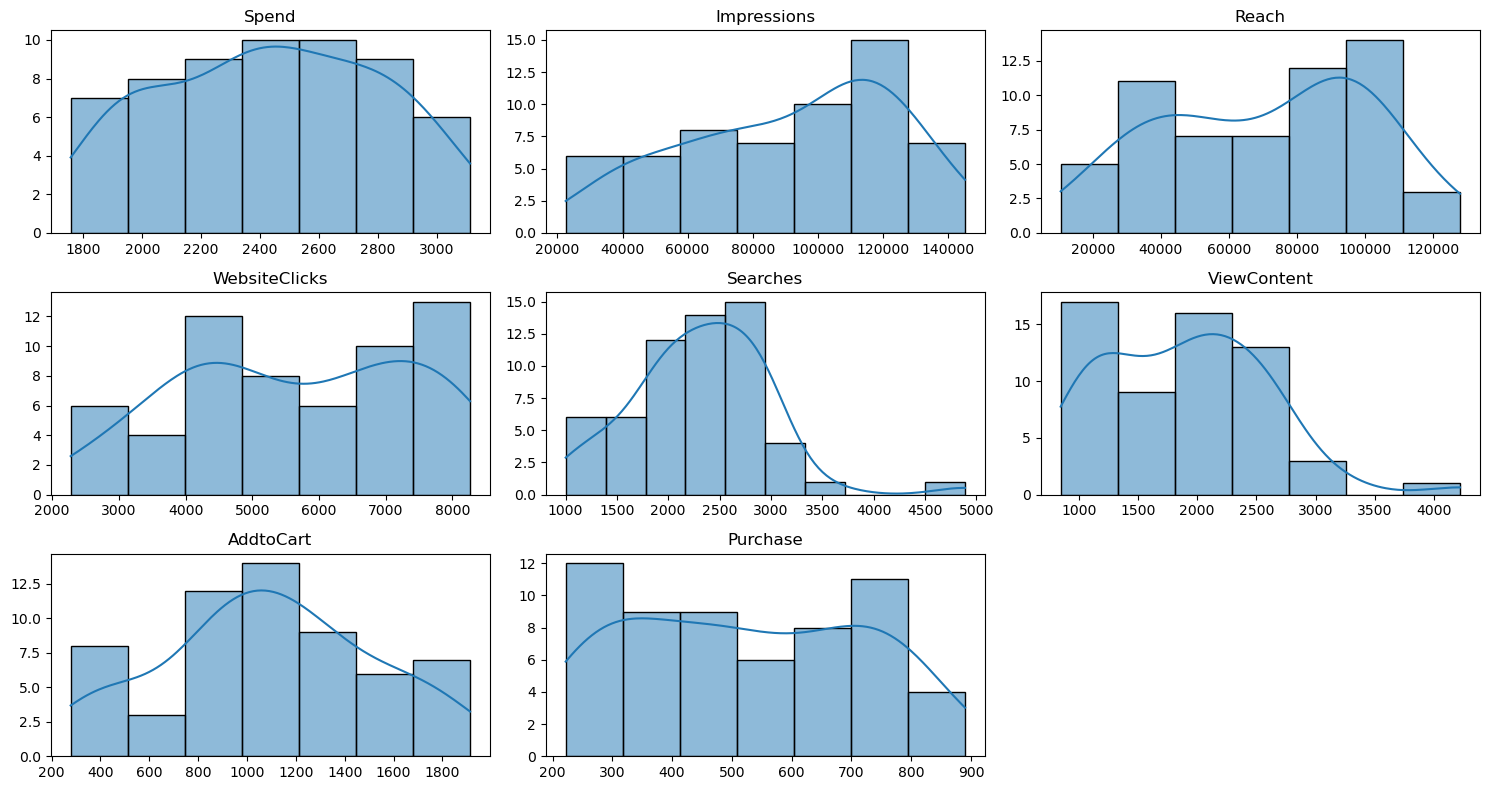

In [17]:
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(15, 8))
axs = axs.flatten()

for i, col in enumerate(num):
    sns.histplot(data=combined, x=col, kde=True, ax=axs[i])
    axs[i].set_title(col)
    axs[i].set_xlabel('')
    axs[i].set_ylabel('')

fig.delaxes(axs[8])
plt.tight_layout()
plt.show()

### Correlation Heatmap for Test and Control Campaigns

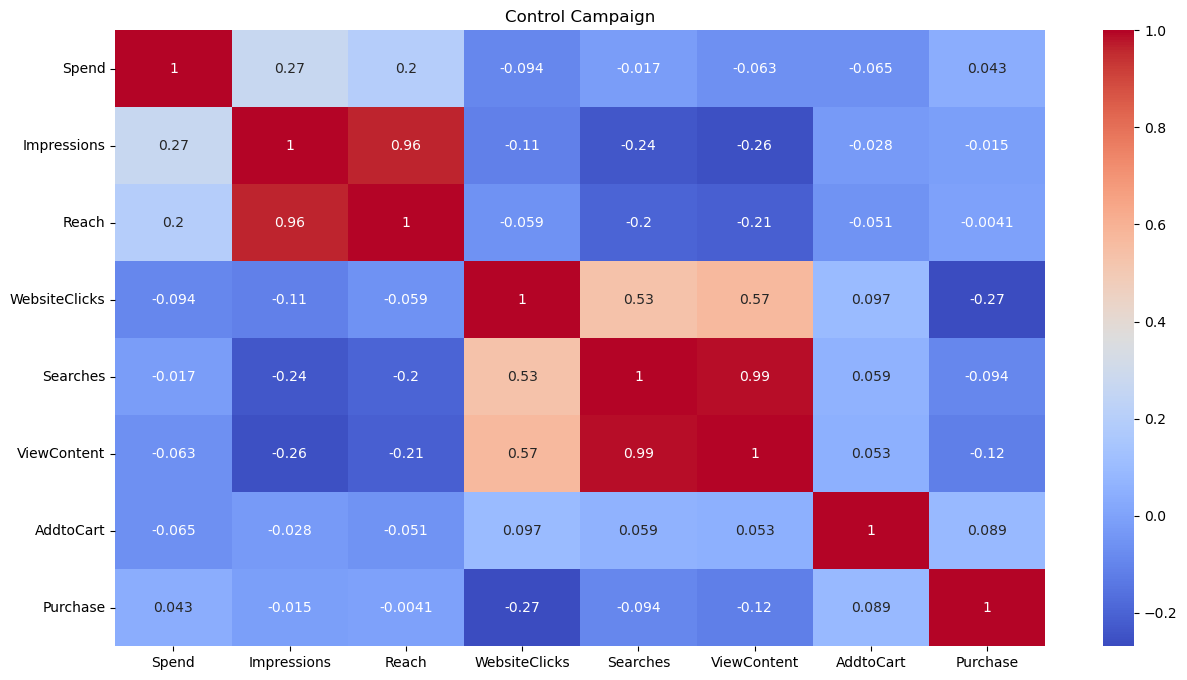

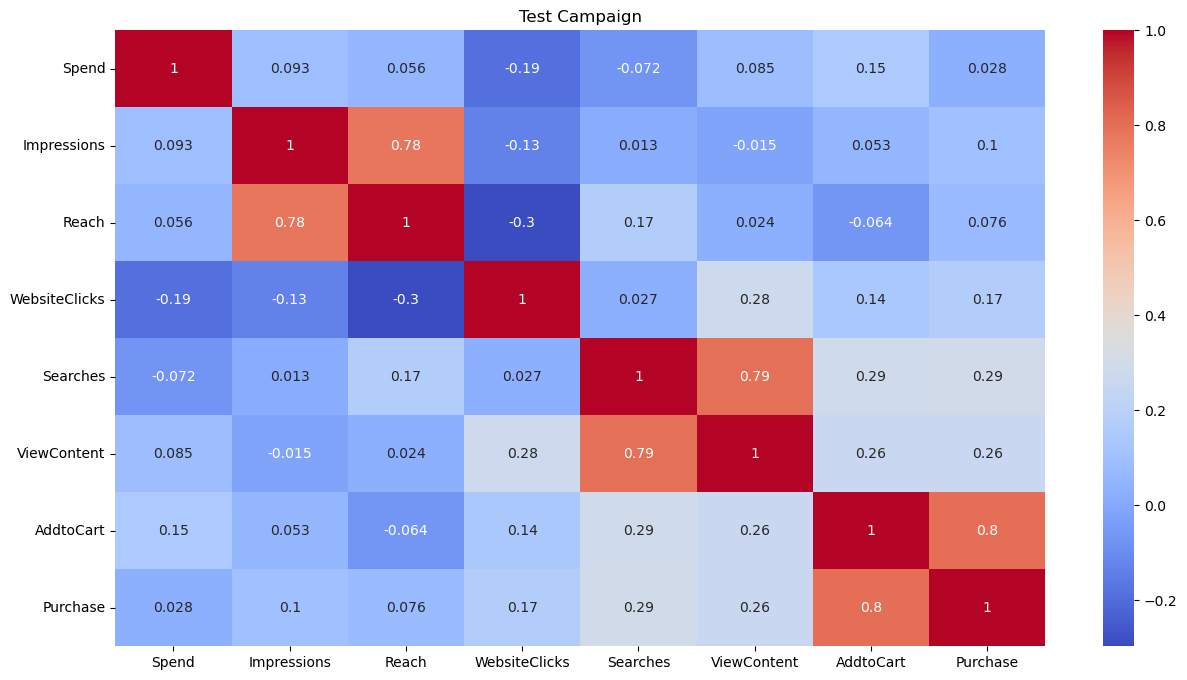

In [18]:
plt.figure(figsize=(15,8))
sns.heatmap(combined[combined['CampaignName'] == 'Control'][num].corr(), annot=True, cmap="coolwarm").set_title("Control Campaign")
plt.figure(figsize=(15,8))
sns.heatmap(combined[combined['CampaignName'] == 'Test'][num].corr(), annot=True, cmap="coolwarm").set_title("Test Campaign")
plt.show()

- In the Control Campaign it seems there is stronger correlation between Spend and Impressions/Reach. This could imply that the **Control Campaign reaches a broader audience** but this is not necessarily resulting in more people adding to cart.
- In the Test Campaign, Purchase and AddtoCart are stronlgy correlated. This is interesting because it not the case in the Control Campaign. But as we noted before, the control campaign reaches a broader audience, but does not necessarily increase the number of people adding to cart. But in the control campaign it seems that it is targeting a more specific audience which is resulting in **a higher conversion rate**.
- In both the Control Campaign and Test Campaign, Searches and View Content are stronlgy correlated, which possibly indicates that the **advertisement matched what customers were searing for.**
- In this campaign,the **amount of spend does not necessarily correlate to higher Purchase rates**. In fact, the amount of spend does not correlate to higher rates in most of the columns. But Spend does result in more people Adding to Cart (0.15) vs the Control Camaign (-0.065), and View Content (which makes sense as the test campaign aims to find customers and market products).
- Interesting to note, that the correlation between Searches, Viewed Content, Add to Cart, and Purchase indicate that the advertisement effectively communicated what the product was to the customer and it was what the customer was searching for.

### Boxplots to Visualize Distributions and Outliers
I will plot *Impressions* and *Reach* seperately for the sake of readability because their values are a lot larger

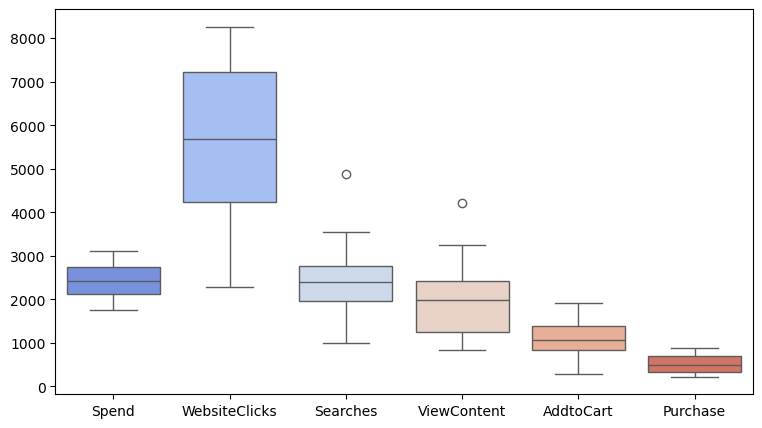

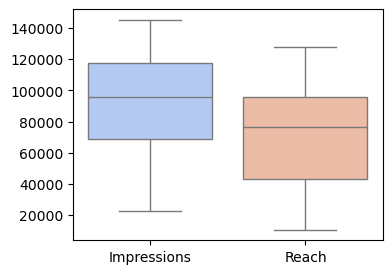

In [19]:
plt.figure(figsize=(9, 5))
sns.boxplot(data=combined[['Spend','WebsiteClicks', 'Searches', 'ViewContent', 
                           'AddtoCart', 'Purchase']],palette="coolwarm" )
plt.figure(figsize=(4, 3))
sns.boxplot(data=combined[['Impressions', 'Reach']], palette="coolwarm")
plt.show()

### Number of Purchases Compared to Spend
I am curious to see if the amount of money spent on a campaign effects the number of purchases made

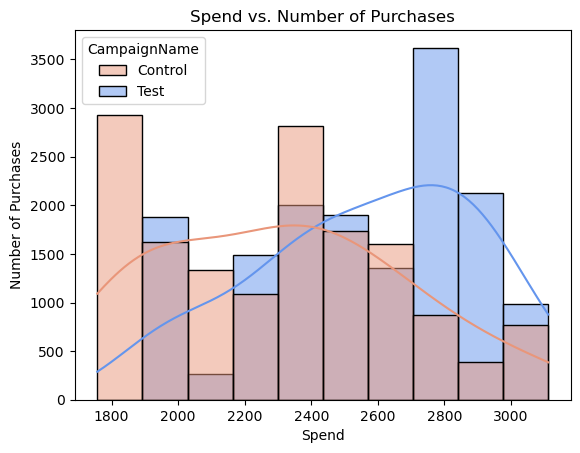

In [20]:
sns.histplot(data=combined, x="Spend", weights="Purchase", kde=True, hue="CampaignName", palette={'Control': 'darksalmon', 'Test': 'cornflowerblue'}, alpha = 0.5)
plt.xlabel('Spend')
plt.ylabel('Number of Purchases')
plt.title('Spend vs. Number of Purchases')
plt.show()

**Test Campaign** <br />
Notice that it looks like the **more money** that is spent on the Test Campaign typically resulted in **more purchases** for the same cost as the Control Campaign. Also, this campaign has the max purchases out of the two, but it also has the min.<br />
**Control Campaign** <br />
Notice that it looks like the **less money** that is spent on the Control Campaign typically resulted in **more purchases** for the same cost as the test group.

## Statistical Tests + Hypothesis Testing
Using statistics, I can determine if the slight difference in some of the metrics is simply due to random chance, or if it was meaningful.

**Null Hypothesis (H0):** There is no difference in the number of purchases between the Test Campaign and the Control Campaign.

**Alternative Hypothesis (H1):** The Test Campaign results in a higher number of purchases compared to the Control Campaign.

At some point, we want to do either **T-Test** Or **Mann-Whitney U Test**. <br />
**Purpose:** Compare the means of numerical variables between the Test and Control campaigns.
- **T-Test:** Use if the data is normally distributed.
- **Mann-Whitney U Test:** Use if the data is not normally distributed.

I will be using a 95% significance level.

### 1. Check for Normality (Shapiro-Wilk Test)
**Purpose:** a statistical test used to assess whether a given sample of data comes from a normally distributed population

In [21]:
from scipy.stats import shapiro
alpha = 0.05 # significance level

def Check_if_Normally_Distributed(metric):
    '''Function to check if the data in the desired metric is normally distributed'''
    _, p_value = shapiro(combined[metric])
    print(f'\n{metric} Normality p-value: {p_value}')
    if p_value > alpha:
        print(f"{metric} is approximately normally distributed.")
    else:
        print(f"{metric} is not normally distributed.")

In [22]:
Check_if_Normally_Distributed('Purchase')


Purchase Normality p-value: 0.005063401178461727
Purchase is not normally distributed.


Since the data is not normally distributed, I will use the **Mann-Whitney U Test** because it compares the distributions of two independent samples and does **not** require the assumption of normality.

But first I want to do do this test again on some selected metrics:

In [23]:
for metric in ['WebsiteClicks', 'Reach', 'AddtoCart']:
    Check_if_Normally_Distributed(metric)


WebsiteClicks Normality p-value: 0.009599885483714505
WebsiteClicks is not normally distributed.

Reach Normality p-value: 0.0498782412287676
Reach is not normally distributed.

AddtoCart Normality p-value: 0.2623393527809113
AddtoCart is approximately normally distributed.


Note that **WebsiteClicks** and **Reach** are **not** normally distributed, so I will use the Mann-Whitney U Test. <br />
Note that **AddtoCart** is normally distributed so I will use the two sample t-test
### 2. Mann-Whitney U Test
**Purpose:** compares the distributions of two independent samples and does not require the assumption of normality.

In [24]:
from scipy.stats import mannwhitneyu

def Run_Mann_Whitney(metric):
    '''Function to run Mann-Whitney U Test with desired metric'''
    test_metric = combined[combined['CampaignName'] == 'Test'][metric]
    control_metric  = combined[combined['CampaignName'] == 'Control'][metric]
    
    stat, p_value = mannwhitneyu(test_metric, control_metric)
    
    print(f'\nMann-Whitney U Test Statistic: {stat}')
    print(f'p-value: {p_value}')

    if p_value < alpha:
        print(f"There is a statistically significant difference in {metric} rates between the Test and Control campaigns.")
    else:
        print(f"There is no significant difference in {metric} rates between the Test and Control campaigns.")

In [25]:
Run_Mann_Whitney('Purchase')


Mann-Whitney U Test Statistic: 431.0
p-value: 0.957674926453464
There is no significant difference in Purchase rates between the Test and Control campaigns.


Based on the results of the Mann-Whitney U Test:
- The **P-value** is 0.9577, which is greater than the significance level of 0.05
- Therefore, we fail to reject the null hypothesis

In [26]:
Run_Mann_Whitney('WebsiteClicks')
Run_Mann_Whitney('Reach')


Mann-Whitney U Test Statistic: 533.0
p-value: 0.13932985609787188
There is no significant difference in WebsiteClicks rates between the Test and Control campaigns.

Mann-Whitney U Test Statistic: 151.0
p-value: 1.7202314302800548e-05
There is a statistically significant difference in Reach rates between the Test and Control campaigns.


### 3. Two Sample T-Test
**Purpose:** to determine whether there are statistically significant differences between the means of two independent groups (assumes normality)

In [27]:
from scipy.stats import ttest_ind

def Run_Two_Sample_TTest(metric):
    '''Function to run Two Sample T-Test with desired metric'''
    test_metric = combined[combined['CampaignName'] == 'Test'][metric]
    control_metric  = combined[combined['CampaignName'] == 'Control'][metric]
    
    t_stat, p_value = ttest_ind(test_metric, control_metric) 
    print(f'\nT-statistic: {t_stat}')
    print(f'p-value: {p_value}')

    if p_value < alpha:
        print(f"The difference in {metric} rates between Test and Control is statistically significant.")
    else:
        print(f"There is no significant difference in {metric} rates between Test and Control.")

In [28]:
Run_Two_Sample_TTest('AddtoCart')


T-statistic: -4.24906420944249
p-value: 8.032960071149043e-05
The difference in AddtoCart rates between Test and Control is statistically significant.


### 4. Pairwise Tests (Purchase, WebsiteClicks, Reach, AddtoCart)
**Purpose:** perform pairwise comparisons between groups <br />
**Action:** use *pairwise_tests* to compare purchases, website clicks, add to cart, and reach across the different campaigns

I will be paying attention to three main things (unless another value stands out significantly):
- **Unadjusted P-value** *(p-unc)*: The unadjusted p-value for the test
- **Bayes Factor** *(BF10)*: which is a measure of evidence in favor of the alternative hypothesis over the null hypothesis 
- **Effect Size** *(hedges g)*: 

In [30]:
import pingouin as pin

In [31]:
# Purchase
pin.pairwise_tests(data=combined, dv='Purchase', between='CampaignName', padjust='none')

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,BF10,hedges
0,CampaignName,Control,Test,False,True,0.030213,56.473077,two-sided,0.976004,0.264,0.007746


- **Unadjusted P-value** *(p-unc)*: is very high (0.976004) and far exceeds the common significance level of 0.05. This means there is no statistically significant difference in *Purchase* rates between the Control and Test campaigns.
- **Bayes Factor** *(BF10)*: indicates moderate evidence in favor of the null hypothesis (0.264).
- **Effect Size** *(hedges g)*: is extremely small (0.007746). This indicates that even if there were a difference, it would be negligible.
- **Overall:** the analysis suggests that there is no meaningful difference in the *Purchase* rates between the Control and Test campaigns

In [32]:
# Website Clicks
pin.pairwise_tests(data=combined,dv='WebsiteClicks', between='CampaignName', padjust='none')

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,BF10,hedges
0,CampaignName,Control,Test,False,True,-1.576144,56.777245,two-sided,0.120549,0.742,-0.405224


- **Unadjusted P-value** *(p-unc)*: is above (0.120549) the common significance level of 0.05. This suggests that there is no statistically significant difference in *WebsiteClicks* between the Control and Test campaigns.
- **Bayes Factor** *(BF10)*: suggests that the evidence is not strongly in favor of either the null or alternative hypothesis (0.742). It indicates some support for the null hypothesis but is not strong enough to make a definitive conclusion.
- **Effect Size** *(hedges g)*: is considered a small to medium effect size (-0.405224), but it’s important to note that it is negative, indicating that the Test campaign might have slightly fewer *WebsiteClicks* compared to the Control. However, given the high p-value, this difference is not statistically significant.
- **Overall:** this analysis suggests that the Test campaign does not lead to a statistically significant difference in *WebsiteClicks* compared to the Control campaign

In [33]:
# Add to Cart
pin.pairwise_tests(data=combined, dv='AddtoCart', between='CampaignName', padjust='none')

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,BF10,hedges
0,CampaignName,Control,Test,False,True,4.23753,54.980306,two-sided,0.000087,259.276,1.091897


- **Unadjusted P-value** *(p-unc)*: is very small (0.000087), this indicates that the difference in *AddtoCart* between the Control and Test campaigns is statistically significant.
- **Bayes Factor** *(BF10)*: (which is a measure of evidence in favor of the alternative hypothesis over the null hypothesis) has a high value (259.276) suggests strong evidence supporting the alternative hypothesis
- **Effect Size** *(hedges g)*: is 1.091897, which is considered a large effect. This means that the difference in the "AddtoCart" rates between the Control and Test campaigns is not only statistically significant but also practically significant.
- **Overall:** the Test campaign has a significantly different impact on AddtoCart compared to the Control campaign, with a large effect size.

This is to be expected

In [34]:
# Reach
pin.pairwise_tests(data=combined, dv='Reach', between='CampaignName', padjust='none')

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,BF10,hedges
0,CampaignName,Control,Test,False,True,5.325114,53.976366,two-sided,0.000002,7922.706,1.362058


- **Unadjusted P-value** *(p-unc)*: is extremely small (0.000002) and well below the significance level of 0.05. This indicates that the difference in *Reach* between the Control and Test campaigns is statistically significant.
- **Bayes Factor** *(BF10)*: provides very strong evidence in favor of the alternative hypothesis, indicating that the observed difference is meaningful and not likely due to random chance (7922.706).
- **Effect Size** *(hedges g)*: is considered a large effect size (1.362058). This suggests that there is a substantial practical difference in *Reach* between the Control and Test campaigns.
- **Overall:** the Test campaign has a significantly higher impact on *Reach* compared to the Control campaign, with a large effect size. The evidence strongly supports the presence of a meaningful difference.

### 5. Additional Performance Indicators
- **Cost Per Acquisition** (CPA)
    - The average cost to acquire a customer.
    - Lower CPA values are preferable, indicating that the campaign is cost-effective in acquiring new customers.
- **Return on Investment** (ROI)
    -  Measures the profitability of an investment (amount spent on advertising).
    - A higher ROI is preferable, indicating better profitability and efficiency of the investment. (Negative ROI indicates loss)
- **Conversion Rate**
    - Measures the percentage of users who take a desired action (in our case, it is making a purchase) out of the total number of users.
    - Higher conersion rates are preferabel, indicating that a higher percentage of users are taking the desired action after clicking on the link.
- **Click-Through Rate** (CTR)
    - The ratio of users who click on a specific link to the number of total users who view an advertisement (measures the effectiveness of an online advertising campaign)
    - A higher CTR is preferable, indicating that a higher percentage of users are clicking on the link compared to those who just view it.
 
Recall from the comany backstory blurb, that each accesory is sold for $5.00 USD. I will use this number when calculating some of the performance indicators

In [35]:
CPA = (combined['Spend'].sum() / combined['Purchase'].sum())

print(f"Total Spend: ${combined['Spend'].sum()}")
print(f"Total Purchases: {combined['Purchase'].sum()}")
print(f"Cost Per Acquisition (CPA): ${CPA:.2f}")

Total Spend: $143710
Total Purchases: 30798
Cost Per Acquisition (CPA): $4.67


In [36]:
combined['ROI'] = ((combined['Purchase']*5 - combined['Spend']) / combined['Spend']) * 100
combined['ConversionRate'] = (combined['Purchase'] / combined['WebsiteClicks']) * 100
combined['CTR'] = (combined['WebsiteClicks'] / combined['Impressions']) * 100
combined[['CampaignName','ROI','ConversionRate', 'CTR']].sample(5).T

,50,39,36,29,48
CampaignName,Test,Test,Test,Test,Test
ROI,-52.397378,38.016529,-26.097394,-57.613032,34.587021
ConversionRate,6.228842,17.813333,5.999443,8.39368,12.066116
CTR,12.750345,4.483876,21.337135,7.681416,15.328097


In [37]:
combined[['CampaignName','ROI','ConversionRate', 'CTR']].describe().T

,count,mean,std,min,25%,50%,75%,max
ROI,59.0,9.546942,44.882055,-60.636247,-33.511002,4.391371,43.078830,121.852468
ConversionRate,59.0,10.335158,5.809819,3.008850,6.332250,8.808438,13.051026,32.235397
CTR,59.0,7.712679,5.629067,1.857546,4.278622,6.379944,8.452497,33.821766


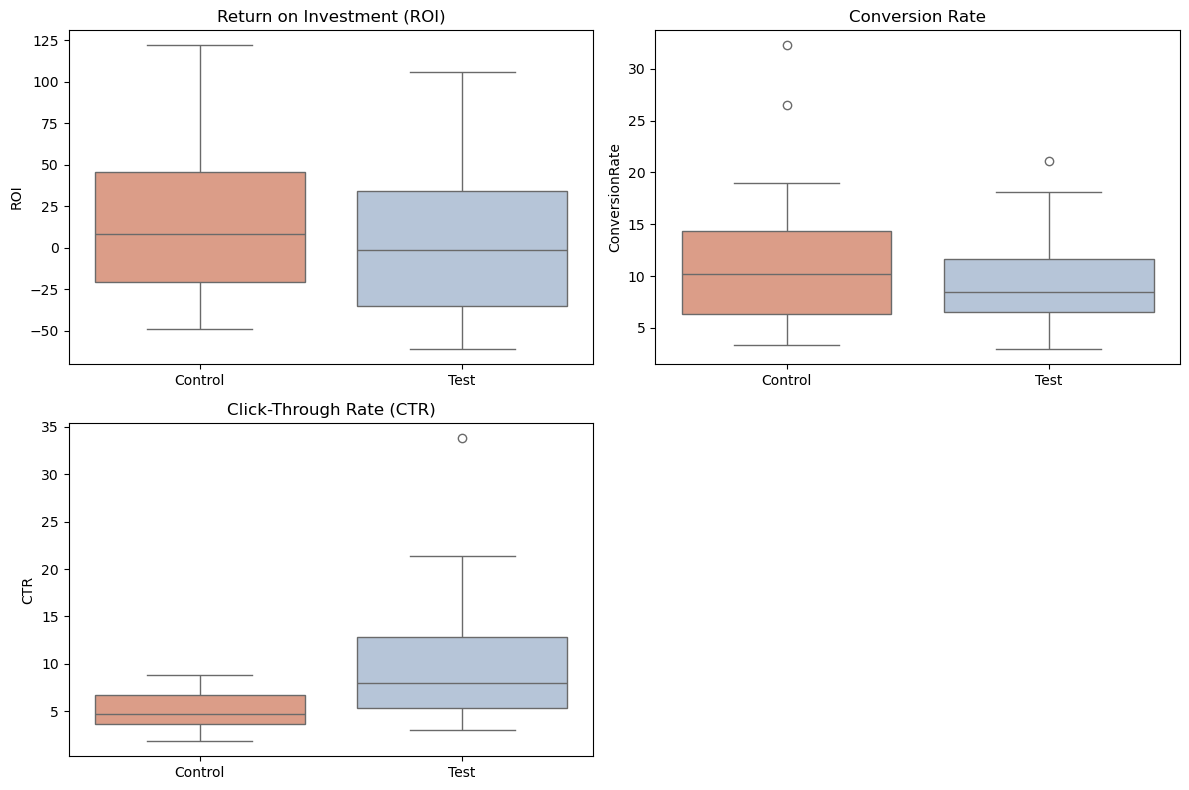

In [38]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

sns.boxplot(x="CampaignName", y="ROI", data=combined, ax=axes[0, 0], hue="CampaignName", palette = ['darksalmon', 'lightsteelblue']).set_title("Return on Investment (ROI)")
axes[0, 0].set_xlabel("") 

sns.boxplot(x="CampaignName", y="ConversionRate", data=combined, ax=axes[0, 1], hue="CampaignName", palette = ['darksalmon', 'lightsteelblue']).set_title("Conversion Rate")
axes[0, 1].set_xlabel("")  

sns.boxplot(x="CampaignName", y="CTR", data=combined, ax=axes[1, 0], hue="CampaignName", palette = ['darksalmon', 'lightsteelblue']).set_title("Click-Through Rate (CTR)")
axes[1, 0].set_xlabel("") 

fig.delaxes(axes[1, 1])
plt.tight_layout()
plt.show()

**Return on Investment (ROI)** <br />
The Control Campaign has a slighlt higher ROI than the Test Campaign<br />
**Click Through Rate (CTR)** <br />
The clickthrough rate for Test Campaign is higher than the Control Campaign.<br />
**Conversion Rate** <br />
The Control Campaign performed better in terms of having a higher conversion rate for website clicks and purchases

Now I want to run a T-Test or Mann-Whitney U Test. But first I will check if the metrics are normally distributed. 

In [39]:
for metric in ['ROI', 'ConversionRate', 'CTR']:
    Check_if_Normally_Distributed(metric)


ROI Normality p-value: 0.03518041453403403
ROI is not normally distributed.

ConversionRate Normality p-value: 7.019604315678887e-05
ConversionRate is not normally distributed.

CTR Normality p-value: 3.330849521508142e-08
CTR is not normally distributed.


In [40]:
for metric in ['ROI', 'ConversionRate', 'CTR']:
    Run_Mann_Whitney(metric)


Mann-Whitney U Test Statistic: 362.0
p-value: 0.27166245232517694
There is no significant difference in ROI rates between the Test and Control campaigns.

Mann-Whitney U Test Statistic: 367.0
p-value: 0.30610346625699913
There is no significant difference in ConversionRate rates between the Test and Control campaigns.

Mann-Whitney U Test Statistic: 677.0
p-value: 0.0002506317299341361
There is a statistically significant difference in CTR rates between the Test and Control campaigns.


## Recap
#### From Visualizations
- The control campaign reaches a broader audience, but that does not result in more people adding to cart. The test campaign seems to be more focused, resulting in a stronger correlation between Add to Cart and Purchase.
- The advertisement seems to be matching what customers are searching for (this is inferred from the strong correlation between viewes, website clicks, add to cart)
- The Control Campaign is more cost effective than the Test Campaign
- The Test Campaign has the most sales
- Recomened for Test Campaign to spend more, and Control Campaign to spend less.

#### Mann-Whitney U Test/ Two Sample T-Test 
- **Purchase:** There is **no** significant difference in *Purchase* rates between the Test and Control campaigns.
- **WebsiteClicks:** There is **no** significant difference in *WebsiteClicks* rates between Test and Control.
- **Reach:** The difference in *Reach* rates between Test and Control **is** statistically significant.
- **AddtoCart:** The difference in *AddtoCart* rates between Test and Control **is** statistically significant.

#### Pairwise Tests 
- **Purchase:** there is no meaningful difference in the *Purchase* rates between the Control and Test campaigns
- **WebsiteClicks:** the Test campaign does not lead to a statistically significant difference in *WebsiteClicks* compared to the Control campaign
- **Reach:** the Test campaign has a significantly higher impact on Reach compared to the Control campaign, with a large effect size. The evidence strongly supports the presence of a meaningful difference.
- **AddtoCart:** the Test campaign has a significantly different impact on AddtoCart compared to the Control campaign, with a large effect size.

#### Additional Performance Indicators
- **Cost Per Acquisition** (CPA): $4.67
- **Return on Investment** (ROI): The Control Campaign performed better
- **Conversion Rate**: The Control Campaign performed better
- **Click Through Rate** (CTR): The Test Campaign performed better
- There is no significant difference in ROI rates between the Test and Control campaigns.
- There is no significant difference in Conversion Rate rates between the Test and Control campaigns
- There **is a statistically significant difference in CTR rates** between the Test and Control campaigns

## Overall 
- **Control Campaign:** Although the Control Campaign effectively reaches a broader audience, this does not result in higher Add to Cart or Purchase rates. The campaign is more cost-effective, indicated by a higher ROI and Conversion Rate.
- **Test Campaign:** The Test Campaign is more effective in converting viewers to customers, as seen in the strong correlation between Add to Cart and Purchase rates. The Test Campaign also has a higher CTR, indicating more engaged viewers.
- **Reach and Add to Cart:** Both metrics show statistically significant differences favoring the Test Campaign.
Purchase and Website Clicks: No significant differences between campaigns.
- The return of the advertisement spend is higher in the Control Campaign than the test campaign

## Recommendations for Company
- Continue with the original advertising strategy. Continuously experiment and perform A/B testing to refine and identify the most effective.
- Focus on more targeted advertising strategies, similar to those used in the Test Campaign, to improve conversion rates.
- Ensure that advertisements align well with what customers are searching for, as evidenced by the strong correlation between Searches and View Content..

## Recommended Further Analysis Steps 
- **Regression Analysis:** Construct a polynomial regression model to predict the number of Impressions, Website Clicks and Purchases. This can be used to identify optimum levels of expenditure on Control and Test campaign.
- **Trend Analysis:** Conduct a time series analysis to understand how campaign performance changes over time and identify any seasonal trends.
- **Segmentation Analysis:** Break down the results by demographic segments (e.g., age, gender, location) to understand which segments respond better to each campaign.